In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rc
import statsmodels.formula.api as smf
from statsmodels.api import qqplot, add_constant

from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import r2_score

In [4]:
# 한글 폰트 깨지지 않게 하기
rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

In [5]:
# 실행결과 경고메시지 출력 제외
import warnings

warnings.filterwarnings('ignore')

### 선형회귀분석

In [7]:
# 부품수리시간

raw_data = pd.read_csv("../01.files/02.Bigsata_analysis/부품수리시간.csv")
raw_data.head()

,UNITS,MINUTES
0,1,23
1,2,29
2,3,49
3,4,64
4,4,74


In [8]:
raw_data.describe().round(3)

,UNITS,MINUTES
count,14.000,14.000
mean,6.000,97.214
std,2.961,46.217
min,1.000,23.000
25%,4.000,66.500
50%,6.000,96.500
75%,8.750,138.500
max,10.000,166.000


<Axes: xlabel='UNITS', ylabel='MINUTES'>

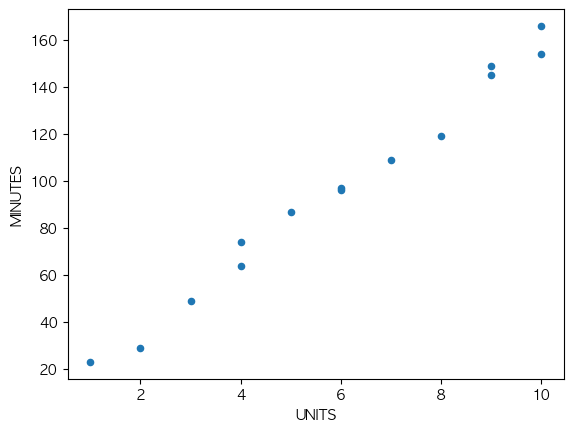

In [9]:
# 유닛이 증가함에 따라 수리시간 증가

raw_data.plot.scatter(x = "UNITS", y = "MINUTES")

In [10]:
# 둘의 상관계수가 매우 높으며 양의 선형관계를 가짐

raw_data.corr(method = "pearson").round(3)

,UNITS,MINUTES
UNITS,1.000,0.994
MINUTES,0.994,1.000


In [11]:
# formula - 예측하고자 하는 칼럼 이름 ~ 원인이 되는 칼럼 이름 으로 연결

reg_model = smf.ols(formula = "MINUTES ~ UNITS", data = raw_data) 
reg_result = reg_model.fit()
print(reg_result.summary())

                            OLS Regression Results                            
Dep. Variable:                MINUTES   R-squared:                       0.987
Model:                            OLS   Adj. R-squared:                  0.986
Method:                 Least Squares   F-statistic:                     943.2
Date:                Mon, 17 Mar 2025   Prob (F-statistic):           8.92e-13
Time:                        14:43:43   Log-Likelihood:                -42.374
No. Observations:                  14   AIC:                             88.75
Df Residuals:                      12   BIC:                             90.03
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.1617      3.355      1.240      0.2

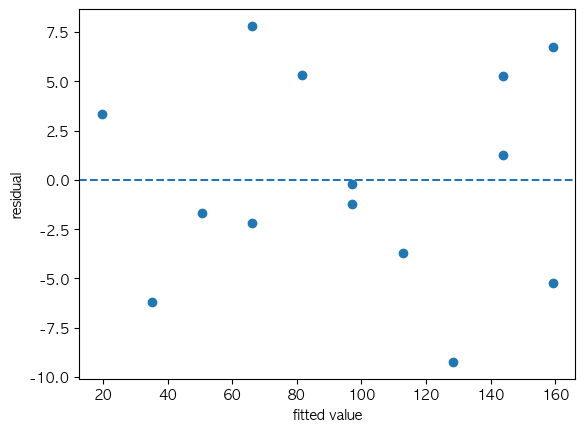

In [12]:
plt.scatter(reg_result.fittedvalues, reg_result.resid)
plt.xlabel("fitted value")
plt.ylabel("residual")

plt.axhline(y = 0, linestyle = "--")

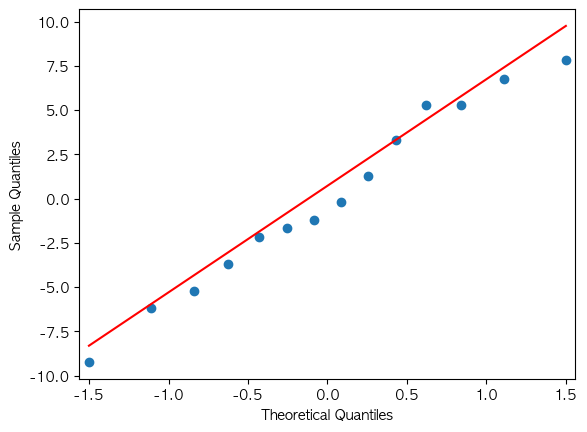

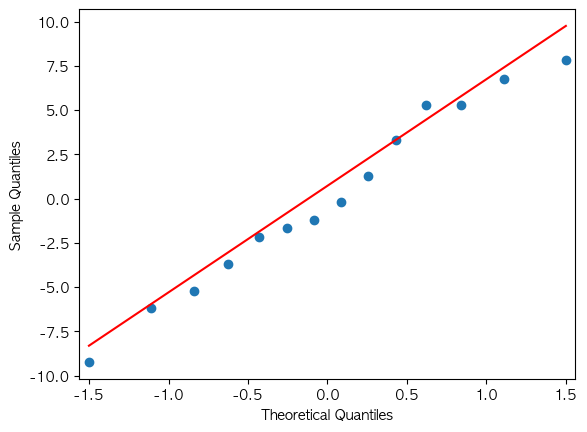

In [13]:
qqplot(reg_result.resid, line = "q")

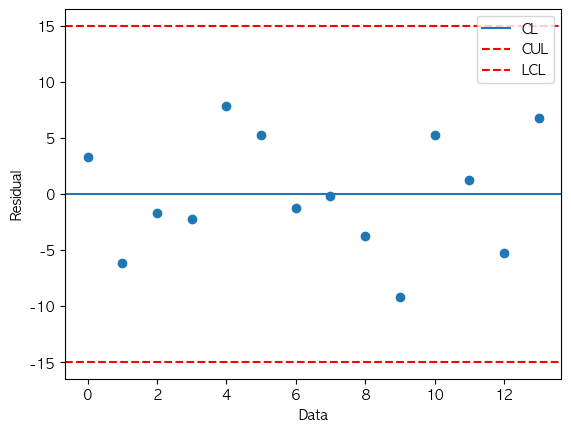

In [15]:
plt.scatter(raw_data.index, reg_result.resid, marker = "o")
plt.xlabel("Data")
plt.ylabel("Residual")
plt.axhline(y = 0, linestyle = "-", label = "CL")
plt.axhline(y = 3 * np.std(reg_result.resid), linestyle = "--", color = "red", label = "CUL")
plt.axhline(y = -3*np.std(reg_result.resid), linestyle="dashed", color = "red", label = "LCL")
plt.legend()
plt.show()

### 다중선형 회귀분석

In [18]:
df = pd.read_csv("../01.files/02.Bigsata_analysis/체질검사.csv", encoding = 'euc-kr')
df.head()

,FAT,AGE,WEIGHT,HEIGHT,NECK,CHEST,ABDOMEN,HIP,THIGH,KNEE,ANKLE,BICEPS,FOREARM,WRIST,GENDER
0,35.2,46,363.15 lb,72.25 inch,51.2,136.2,148.1,147.7,87.3,49.1,29.6,45.0,29.0,21.4,남성
1,11.8,27,168 lb,71.25 inch,38.1,93.0,79.1,94.5,57.3,36.2,24.5,29.0,30.0,18.8,남성
2,22.2,69,177.75 lb,68.5 inch,38.7,102.0,95.0,98.3,55.0,38.3,21.8,30.8,25.7,18.8,남성
3,10.6,57,147.75 lb,65.75 inch,35.2,99.6,86.4,90.1,53.0,35.0,21.3,31.7,27.3,16.9,여성
4,47.5,51,219 lb,64 inch,41.2,119.8,122.1,112.8,62.5,36.9,23.6,34.7,29.1,18.4,여성


In [19]:
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 15 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   FAT      252 non-null    float64
 1   AGE      252 non-null    int64  
 2   WEIGHT   252 non-null    object 
 3   HEIGHT   252 non-null    object 
 4   NECK     252 non-null    float64
 5   CHEST    252 non-null    float64
 6   ABDOMEN  252 non-null    float64
 7   HIP      252 non-null    float64
 8   THIGH    252 non-null    float64
 9   KNEE     252 non-null    float64
 10  ANKLE    252 non-null    float64
 11  BICEPS   252 non-null    float64
 12  FOREARM  252 non-null    float64
 13  WRIST    252 non-null    float64
 14  GENDER   252 non-null    object 
dtypes: float64(11), int64(1), object(3)
memory usage: 29.7+ KB


FAT        0
AGE        0
WEIGHT     0
HEIGHT     0
NECK       0
CHEST      0
ABDOMEN    0
HIP        0
THIGH      0
KNEE       0
ANKLE      0
BICEPS     0
FOREARM    0
WRIST      0
GENDER     0
dtype: int64

In [20]:
df[['WEIGHT', 'WEIGHT_UNIT']] = df['WEIGHT'].str.split(expand = True)
df[['HEIGHT', 'HEIGHT_UNIT']] = df['HEIGHT'].str.split(expand = True)
df['WEIGHT'] = df['WEIGHT'].astype('float64')
df['HEIGHT'] = df['HEIGHT'].astype('float64')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   FAT          252 non-null    float64
 1   AGE          252 non-null    int64  
 2   WEIGHT       252 non-null    float64
 3   HEIGHT       252 non-null    float64
 4   NECK         252 non-null    float64
 5   CHEST        252 non-null    float64
 6   ABDOMEN      252 non-null    float64
 7   HIP          252 non-null    float64
 8   THIGH        252 non-null    float64
 9   KNEE         252 non-null    float64
 10  ANKLE        252 non-null    float64
 11  BICEPS       252 non-null    float64
 12  FOREARM      252 non-null    float64
 13  WRIST        252 non-null    float64
 14  GENDER       252 non-null    object 
 15  WEIGHT_UNIT  252 non-null    object 
 16  HEIGHT_UNIT  252 non-null    object 
dtypes: float64(13), int64(1), object(3)
memory usage: 33.6+ KB


In [21]:
df = df.drop(['WEIGHT_UNIT','HEIGHT_UNIT'], axis = 1)
df_edit = pd.get_dummies(df, drop_first = True)
df_edit.head()

,FAT,AGE,WEIGHT,HEIGHT,NECK,CHEST,ABDOMEN,HIP,THIGH,KNEE,ANKLE,BICEPS,FOREARM,WRIST,GENDER_여성
0,35.2,46,363.15,72.25,51.2,136.2,148.1,147.7,87.3,49.1,29.6,45.0,29.0,21.4,0
1,11.8,27,168.00,71.25,38.1,93.0,79.1,94.5,57.3,36.2,24.5,29.0,30.0,18.8,0
2,22.2,69,177.75,68.50,38.7,102.0,95.0,98.3,55.0,38.3,21.8,30.8,25.7,18.8,0
3,10.6,57,147.75,65.75,35.2,99.6,86.4,90.1,53.0,35.0,21.3,31.7,27.3,16.9,1
4,47.5,51,219.00,64.00,41.2,119.8,122.1,112.8,62.5,36.9,23.6,34.7,29.1,18.4,1


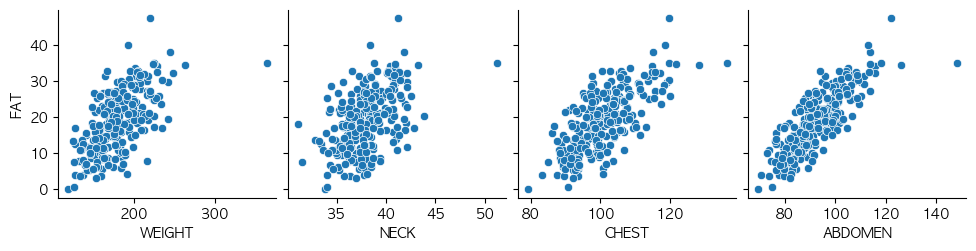

In [23]:
sns.pairplot(df_edit, y_vars = 'FAT', x_vars = ['WEIGHT', 'NECK', 'CHEST', 'ABDOMEN'])

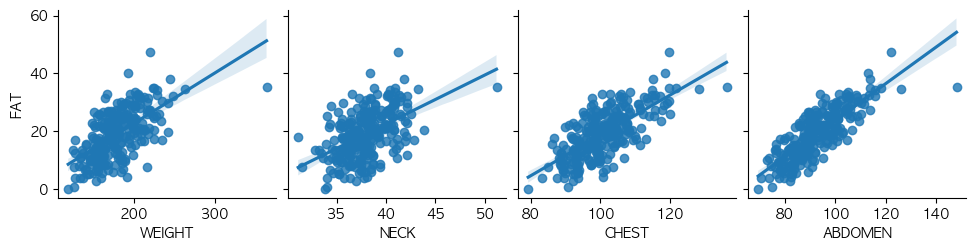

In [24]:
sns.pairplot(df_edit, y_vars = 'FAT', x_vars = ['WEIGHT', 'NECK', 'CHEST', 'ABDOMEN'], kind = 'reg')

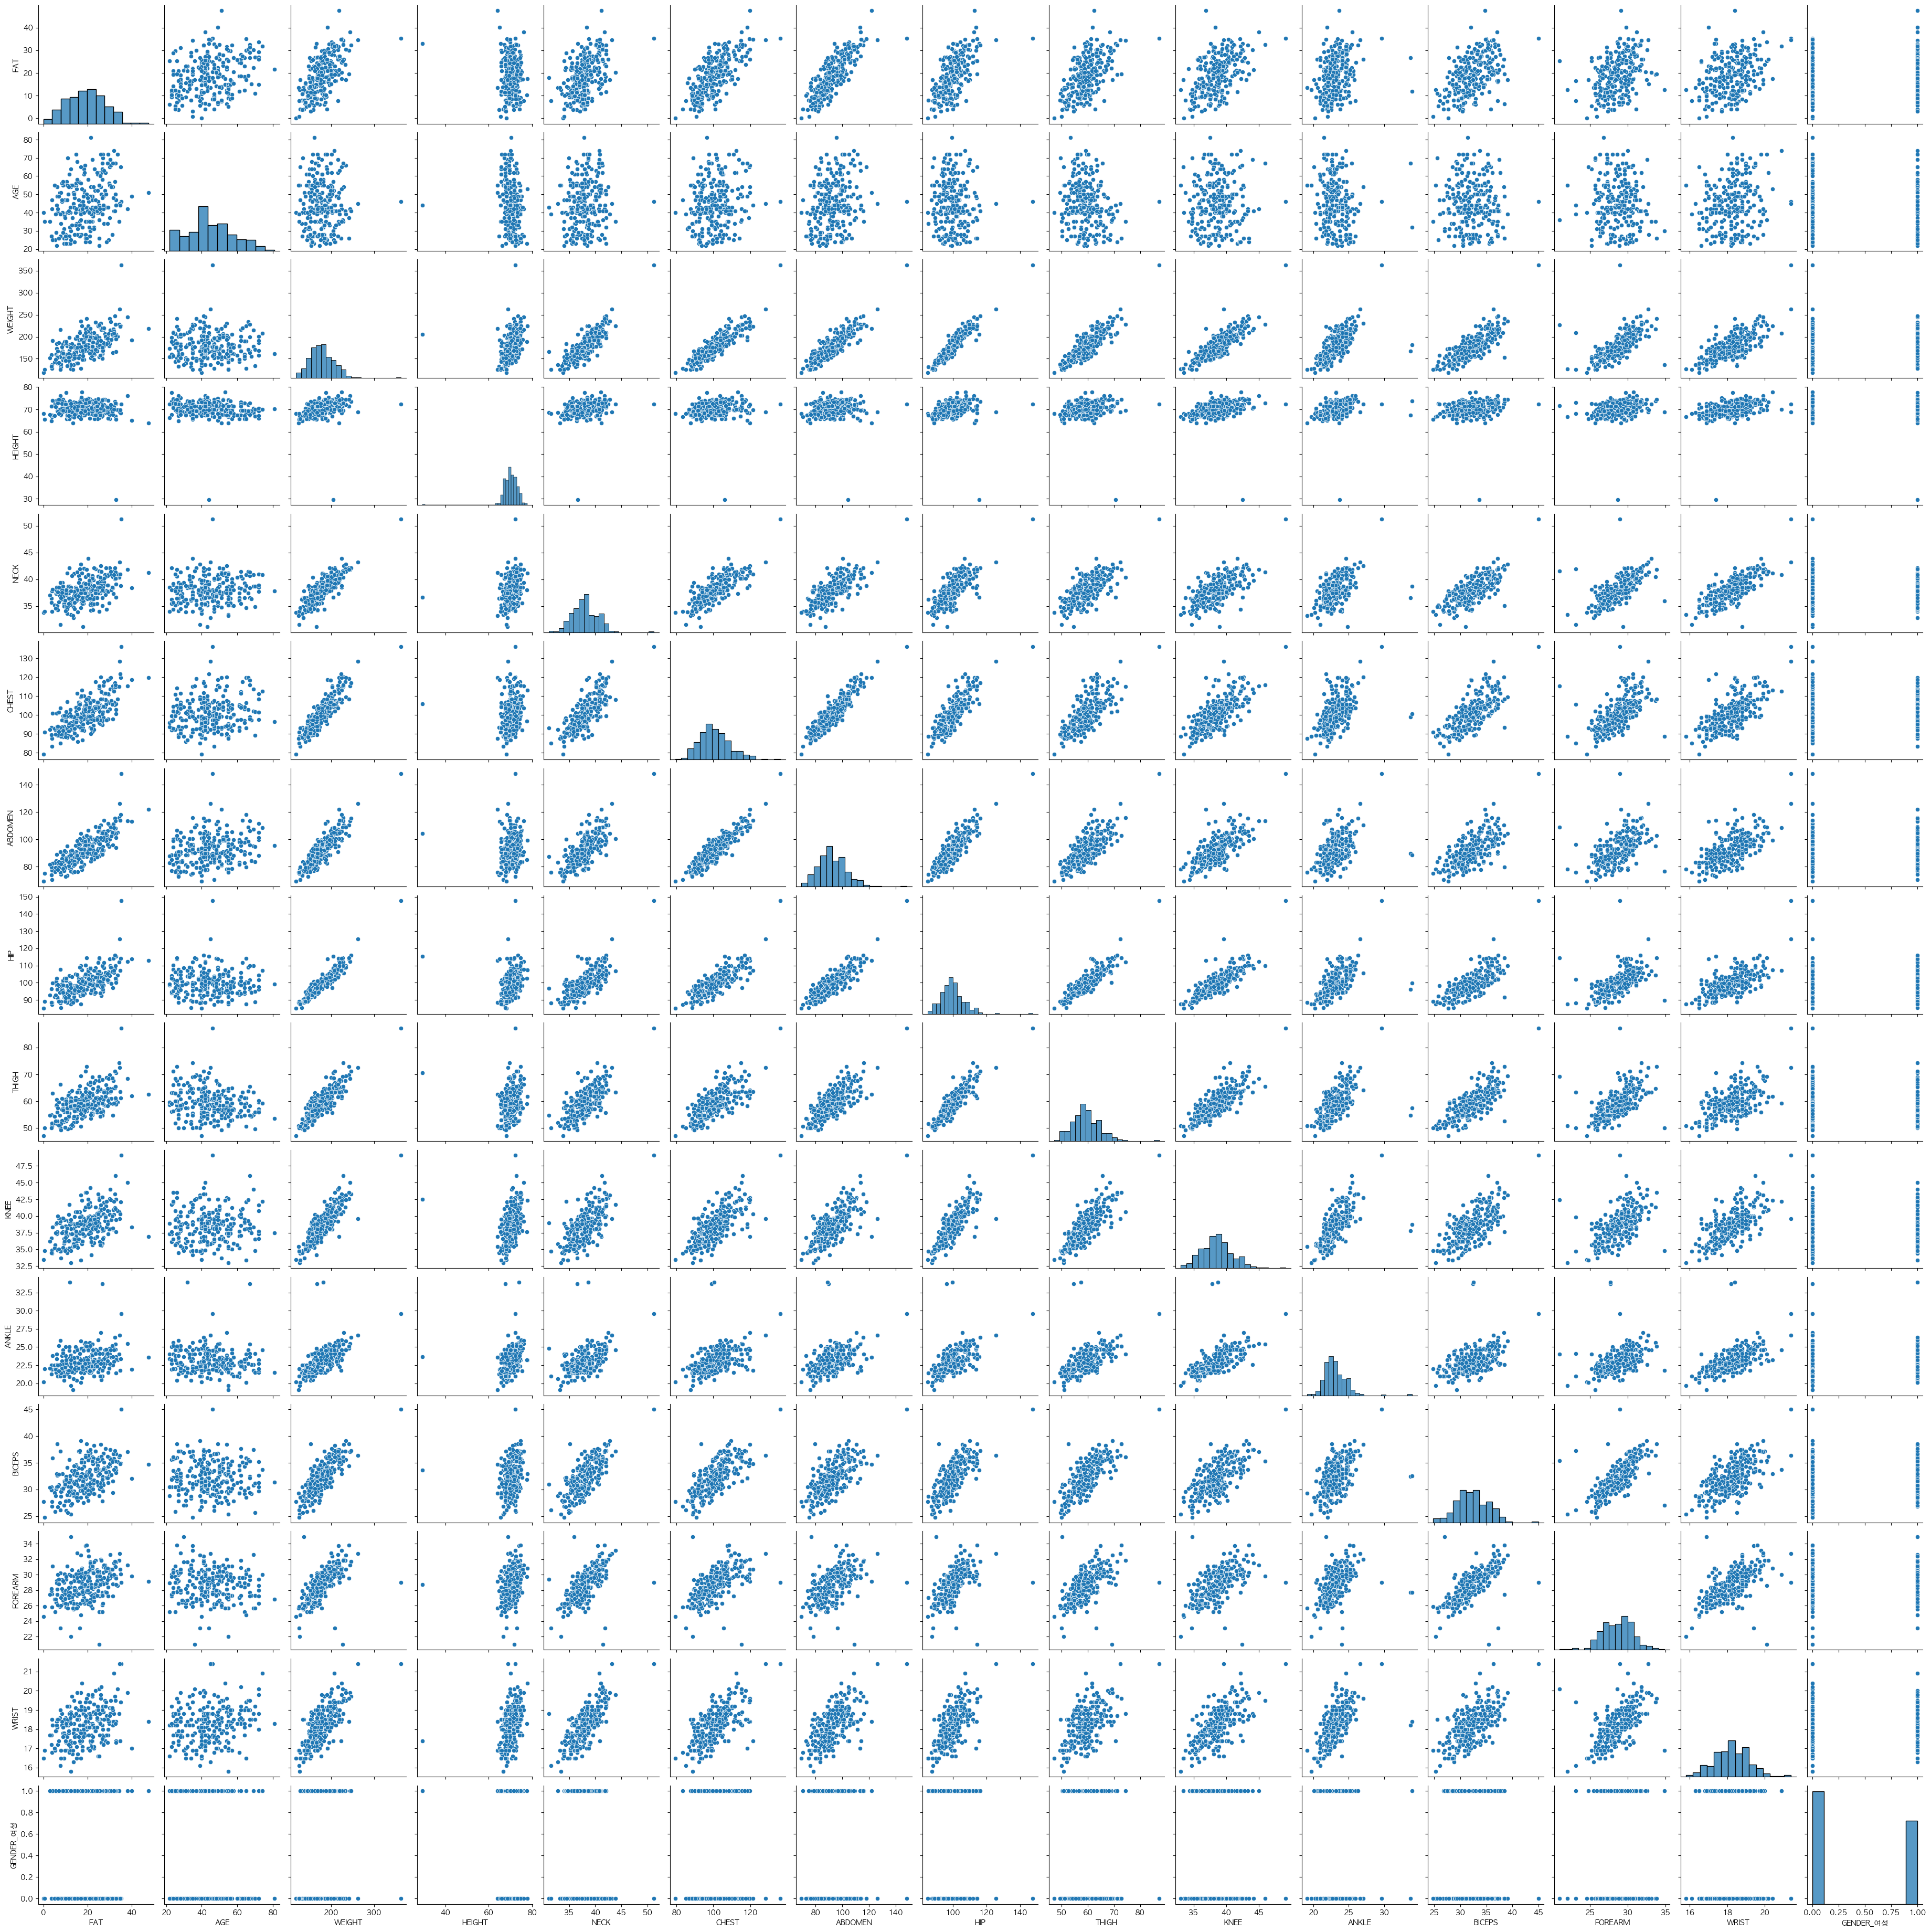

In [25]:
sns.pairplot(df_edit)

In [26]:
df_edit.corr().round(3)

,FAT,AGE,WEIGHT,HEIGHT,NECK,CHEST,ABDOMEN,HIP,THIGH,KNEE,ANKLE,BICEPS,FOREARM,WRIST,GENDER_여성
FAT,1.000,0.291,0.612,-0.089,0.491,0.703,0.813,0.625,0.560,0.509,0.266,0.493,0.361,0.347,-0.033
AGE,0.291,1.000,-0.013,-0.172,0.114,0.176,0.230,-0.050,-0.200,0.018,-0.105,-0.041,-0.085,0.214,-0.063
WEIGHT,0.612,-0.013,1.000,0.308,0.831,0.894,0.888,0.941,0.869,0.853,0.614,0.800,0.630,0.730,-0.009
HEIGHT,-0.089,-0.172,0.308,1.000,0.254,0.135,0.088,0.170,0.148,0.286,0.265,0.208,0.229,0.322,0.025
NECK,0.491,0.114,0.831,0.254,1.000,0.785,0.754,0.735,0.696,0.672,0.478,0.731,0.624,0.745,0.010
CHEST,0.703,0.176,0.894,0.135,0.785,1.000,0.916,0.829,0.730,0.719,0.483,0.728,0.580,0.660,-0.014
ABDOMEN,0.813,0.230,0.888,0.088,0.754,0.916,1.000,0.874,0.767,0.737,0.453,0.685,0.503,0.620,-0.017
HIP,0.625,-0.050,0.941,0.170,0.735,0.829,0.874,1.000,0.896,0.823,0.558,0.739,0.545,0.630,-0.042
THIGH,0.560,-0.200,0.869,0.148,0.696,0.730,0.767,0.896,1.000,0.799,0.540,0.761,0.567,0.559,-0.040
KNEE,0.509,0.018,0.853,0.286,0.672,0.719,0.737,0.823,0.799,1.000,0.612,0.679,0.556,0.665,-0.034


In [27]:
df_train, df_test = train_test_split(df_edit, test_size = 0.3, random_state = 777)
print(f"train data size: {df_train.shape}")
print(f"test data size: {df_test.shape}")

train data size: (176, 15)
test data size: (76, 15)


In [79]:
column_list = df_train.columns.tolist()
column_list

['FAT',
 'AGE',
 'WEIGHT',
 'HEIGHT',
 'NECK',
 'CHEST',
 'ABDOMEN',
 'HIP',
 'THIGH',
 'KNEE',
 'ANKLE',
 'BICEPS',
 'FOREARM',
 'WRIST',
 'GENDER_여성']

In [80]:
def make_formula_txt(column_list):
    formula_text = column_list[0] + " ~ "
    for i in range(1, len(column_list)):
        formula_text += column_list[i] + "+"
    formula_text = formula_text[:-1]
    formula_text
    
    return formula_text

In [102]:
formula_text = make_formula_txt(column_list)

reg_model = smf.ols(formula = formula_text, data = df_train)

reg_result = reg_model.fit()
print(reg_result.summary())

                            OLS Regression Results                            
Dep. Variable:                    FAT   R-squared:                       0.735
Model:                            OLS   Adj. R-squared:                  0.729
Method:                 Least Squares   F-statistic:                     118.5
Date:                Mon, 17 Mar 2025   Prob (F-statistic):           3.30e-48
Time:                        16:52:29   Log-Likelihood:                -513.55
No. Observations:                 176   AIC:                             1037.
Df Residuals:                     171   BIC:                             1053.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -38.2088      8.347     -4.578      0.0

In [101]:
column_list.remove('WRIST')

In [103]:
column_list

['FAT', 'WEIGHT', 'NECK', 'ABDOMEN', 'FOREARM']

In [106]:
df_train_x = df_train[column_list[1:]]
df_train_c_const = add_constant(df_train_x)
df_vif = pd.DataFrame()
df_vif["variable"] = df_train_c_const.columns
df_vif["VIF"] = [variance_inflation_factor(df_train_c_const.values, i) for i in range(df_train_c_const.shape[1])]

df_vif.sort_values('VIF', inplace = True)
df_vif.round(2)

,variable,VIF
4,FOREARM,1.75
2,NECK,3.82
3,ABDOMEN,5.53
1,WEIGHT,8.61
0,const,594.38


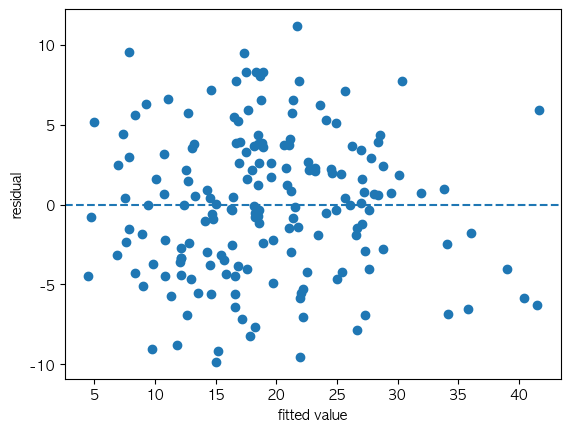

In [107]:
plt.scatter(reg_result.fittedvalues, reg_result.resid)
plt.xlabel("fitted value")
plt.ylabel("residual")
plt.axhline(y = 0, linestyle = "--")

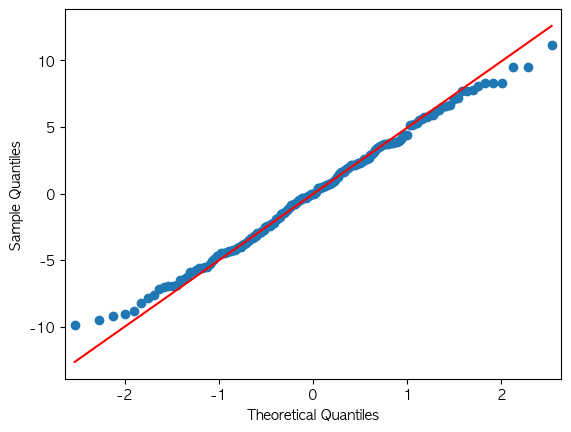

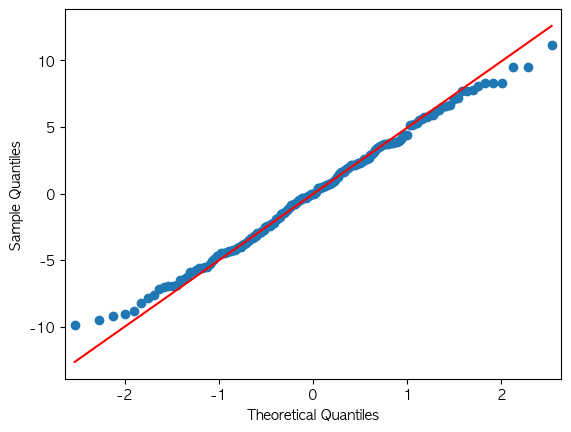

In [108]:
qqplot(reg_result.resid, line = 'q')

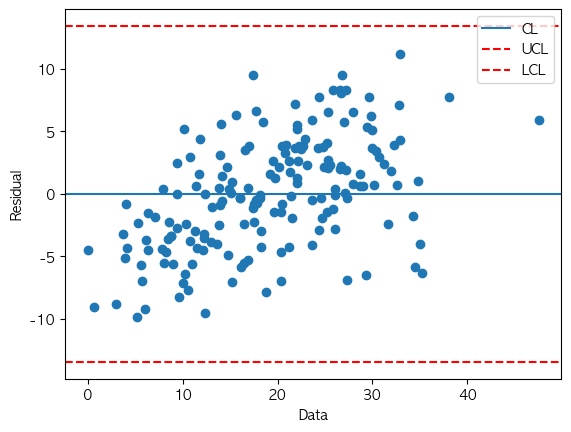

In [110]:
# 59 Page
# 잔차의 독립성 확인
plt.scatter(df_train['FAT'], reg_result.resid)
plt.xlabel("Data")  ;  plt.ylabel("Residual")
plt.axhline(y=0,linestyle="-", label='CL')
plt.axhline(y=3*np.std(reg_result.resid),linestyle="--",color="red",label='UCL' )
plt.axhline(y=-3*np.std(reg_result.resid),linestyle="dashed",color="red",label='LCL')
plt.legend()